# 1. Configurando o ambiente

In [1]:
import pandas as pd
import numpy as np

from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

%matplotlib inline

# 2. Pré-processamento dos dados
## 2.1. Carregando os dados
$x^2$

In [2]:
df = pd.read_csv('google.csv')
df.head()

,Date,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
1,2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2,2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
3,2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
4,2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0


ModuleNotFoundError: No module named 'xlwt'

In [3]:
df.index

RangeIndex(start=0, stop=3424, step=1)

In [4]:
#Definindo o index do dataset convertendo o formato dos dados para 'datetime'
df.index = pd.to_datetime(df['Date'])

In [5]:
df.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-19',
               '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23',
               '2018-03-26', '2018-03-27'],
              dtype='datetime64[ns]', name='Date', length=3424, freq=None)

In [6]:
df = df.drop(columns=['Date'])

In [7]:
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0


## 2.3. Transformação dos dados

Gerando novos atributos a partir dos dados já existentes

In [8]:
#Percentual de variação entre alta e baixa
df['HL_PCT'] = (df['Adj. High']-df['Adj. Close']) / df['Adj. Close'] * 100.0

In [9]:
#Percentual de mudança entre abertura e fechamento
df['PCT_change'] = (df['Adj. Close']-df['Adj. Open']) / df['Adj. Open'] * 100.0

### Rolling
Permite realizar cálculos com janela deslizante.

In [10]:
#Média móvel
df['Adj. Close Mean'] = df['Adj. Close'].rolling(6).mean()

In [11]:
#Opção binária
df['Adj. Close_b'] = df['Adj. Close'] > df['Adj. Open']

In [12]:
df['2004-08-19':'2004-08-29']

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT,PCT_change,Adj. Close Mean,Adj. Close_b
Date,,,,,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0,3.712563,0.324968,NaN,True
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0,0.710922,7.227007,NaN,True
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0,3.729433,-1.227880,NaN,False
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0,6.417469,-5.726357,NaN,False
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0,1.886792,1.183658,NaN,True
2004-08-26,52.637487,54.142132,52.492038,54.122070,7094800.0,0.037068,2.820391,53.233075,True
2004-08-27,54.217364,54.478169,53.008633,53.239345,6211700.0,2.326896,-1.803885,53.719159,False


In [13]:
#Seleção de atributos
df_forecast = pd.DataFrame(df['Adj. Close'])

In [14]:
df_forecast.head()

,Adj. Close
Date,
2004-08-19,50.322842
2004-08-20,54.322689
2004-08-23,54.869377
2004-08-24,52.597363
2004-08-25,53.164113


In [15]:
df_forecast.isna().sum()

Adj. Close    0
dtype: int64

In [16]:
#Convertendo a série temporal em uma frequência específica
df_forecast = df_forecast.asfreq(freq='B')

Time rule strings:

B:  business day

D:  calendar day;

W:  weekly;

M:  month;

A:  year end;

AS: year start.

In [17]:
df_forecast.isna().sum()

Adj. Close    125
dtype: int64

Técnicas para tratamento de dados ausentes:

## 2.4. Imputação

1. Eliminar
2. Prenchimento manual
3. Algoritmos de AM
4. Métodos heurísticos
    1. Novo valor
    2. Média / Moda

Ferramentas disponíveis em python:
1. fillna
2. Interpolate

### 2.4.1. Fillna
[Ir](5-2-fillna.ipynb)

### 2.4.2. interpolate
É um método com o qual é possível construir um conjunto de dados a partir de outro conjunto de dados pontuais

##### linear

Ignora o index e trata os valores como estivessem igualmente separados

In [18]:
df_forecast['adj_close_i'] = df_forecast['Adj. Close'].interpolate(method='linear')

In [19]:
df_forecast.isna().sum()

Adj. Close     125
adj_close_i      0
dtype: int64

In [20]:
#Estudo de caso
df_forecast['2005-09-01':'2005-09-08']

,Adj. Close,adj_close_i
Date,,
2005-09-01,143.568181,143.568181
2005-09-02,144.671587,144.671587
2005-09-05,NaN,144.335550
2005-09-06,143.999513,143.999513
2005-09-07,147.891527,147.891527
2005-09-08,148.152332,148.152332


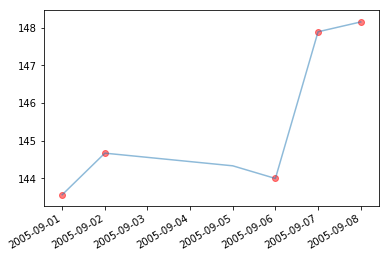

In [21]:
fig, ax = plt.subplots()

ax.plot(df_forecast['2005-09-01':'2005-09-08'].index.values,
        df_forecast['2005-09-01':'2005-09-08'].adj_close_i.values,
        alpha=0.5)
ax.scatter(df_forecast['2005-09-01':'2005-09-08'].index.values,
        df_forecast['2005-09-01':'2005-09-08']['Adj. Close'].values,
        c='r',
        alpha=0.5)

fig.autofmt_xdate()

In [22]:
df_forecast = df_forecast.drop(columns=['Adj. Close'])
df_forecast.head()

,adj_close_i
Date,
2004-08-19,50.322842
2004-08-20,54.322689
2004-08-23,54.869377
2004-08-24,52.597363
2004-08-25,53.164113


# Lag com Shift

Lag é uma operação estatística que produz os elementos anteriores de uma série temporal.

In [23]:
#Gerando lag para os últimos 4 dias
for lag in range(1,5):
    df_forecast['adj_close' + ' t-' + str(lag)] = df_forecast['adj_close_i'].shift(lag)

In [24]:
df_forecast.head()

,adj_close_i,adj_close t-1,adj_close t-2,adj_close t-3,adj_close t-4
Date,,,,,
2004-08-19,50.322842,NaN,NaN,NaN,NaN
2004-08-20,54.322689,50.322842,NaN,NaN,NaN
2004-08-23,54.869377,54.322689,50.322842,NaN,NaN
2004-08-24,52.597363,54.869377,54.322689,50.322842,NaN
2004-08-25,53.164113,52.597363,54.869377,54.322689,50.322842


In [25]:
#removendo dados faltantes
df_forecast = df_forecast.dropna()
df_forecast.head()

,adj_close_i,adj_close t-1,adj_close t-2,adj_close t-3,adj_close t-4
Date,,,,,
2004-08-25,53.164113,52.597363,54.869377,54.322689,50.322842
2004-08-26,54.122070,53.164113,52.597363,54.869377,54.322689
2004-08-27,53.239345,54.122070,53.164113,52.597363,54.869377
2004-08-30,51.162935,53.239345,54.122070,53.164113,52.597363
2004-08-31,51.343492,51.162935,53.239345,54.122070,53.164113


# 3. Predição

In [26]:
#separando atributo alvo
x = df_forecast.drop(columns=['adj_close_i']).values
y = df_forecast['adj_close_i'].values

In [27]:
x.shape

(3545, 4)

In [28]:
#Separando dados entre treino e teste
xtrain = x[:-100]
xtest = x[-100:]
ytrain = y[:-100]
ytest = y[-100:]

In [29]:
xtrain.shape

(3445, 4)

In [30]:
xtest.shape

(100, 4)

### Multi-layer Perceptron


In [31]:
#instanciando e treinando o modelo de regressão com redes neurais
model = MLPRegressor(hidden_layer_sizes=(100, 60, 20), activation='relu', max_iter=1000)
model.fit(xtrain, ytrain)
pred = model.predict(xtest)

In [32]:
#Avaliação do modelo por Erro Absoluto Médio (MAE)
mean_absolute_error(y_true=ytest, y_pred=pred)

14.194096206161362

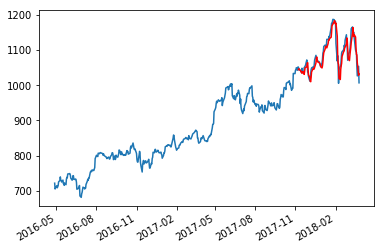

In [33]:
#Análise gráfica
a = df_forecast.index[-500:]
fig, ax = plt.subplots()
ax.plot(a, y[-500:])
ax.plot(a[-100:], model.predict(xtest), c='r')
fig.autofmt_xdate()

In [34]:
#Utiliza os dados do dia anterior para fazer a predição
y_magico = df_forecast['adj_close_i'].shift(1)[-100:]
mean_absolute_error(y_true=ytest, y_pred=y_magico)

11.817699999999988

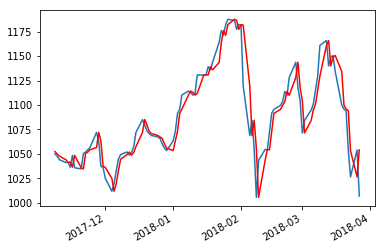

In [35]:
a = df_forecast.index[-100:]
fig, ax = plt.subplots()
ax.plot(a, y[-100:])
ax.plot(a[-100:], y_magico, c='r')
fig.autofmt_xdate()

In [36]:
#Opções binárias
y_b = df_forecast['adj_close_i'] > df_forecast['adj_close_i'].shift(1)

In [37]:
#separando os dados de treino e teste
y_b_train = y_b[:-100]
y_b_test = y_b[-100:]

In [38]:
#Instanciando e treinando um classificador com redes neurais
model = MLPClassifier(hidden_layer_sizes=(100, 60, 20), activation='relu', max_iter=1000)
model.fit(xtrain, y_b_train)
pred = model.predict(xtest)

In [39]:
accuracy_score(y_true=y_b_test, y_pred=pred)

0.52

In [40]:
# Utilizando outros atributos para classificação binária
df_forecast2 = df.drop(columns=['Adj. Open','Adj. High','Adj. Low','Adj. Close'])

In [41]:
df_forecast2 = df_forecast2.dropna()

In [42]:
df_forecast2.head()

,Adj. Volume,HL_PCT,PCT_change,Adj. Close Mean,Adj. Close_b
Date,,,,,
2004-08-26,7094800.0,0.037068,2.820391,53.233075,True
2004-08-27,6211700.0,2.326896,-1.803885,53.719159,False
2004-08-30,5196700.0,3.411430,-3.106003,53.192534,False
2004-08-31,4917800.0,1.308977,0.048866,52.604886,True
2004-09-01,9138200.0,2.713217,-2.385589,52.218694,False


In [43]:
df_forecast2 = df_forecast2.asfreq(freq='B')

In [44]:
df_forecast2.isna().sum()

Adj. Volume        125
HL_PCT             125
PCT_change         125
Adj. Close Mean    125
Adj. Close_b       125
dtype: int64

In [45]:
df_forecast2 = df_forecast2.interpolate(method='linear')

In [46]:
df_forecast2.isna().sum()

Adj. Volume          0
HL_PCT               0
PCT_change           0
Adj. Close Mean      0
Adj. Close_b       125
dtype: int64

In [47]:
#df_forecast2['Adj. Close_b'] = df_forecast2['Adj. Close_b'].fillna(method='ffill')
df_forecast2['Adj. Close_b'] = df_forecast2['PCT_change']>0

In [48]:
df_forecast2.isna().sum()

Adj. Volume        0
HL_PCT             0
PCT_change         0
Adj. Close Mean    0
Adj. Close_b       0
dtype: int64

In [49]:
#Como está a escala?
df_forecast2.describe()

,Adj. Volume,HL_PCT,PCT_change,Adj. Close Mean
count,3.544000e+03,3544.000000,3544.000000,3544.000000
mean,7.735866e+06,1.050439,-0.018040,409.130521
std,8.152645e+06,1.117016,1.482469,257.271658
min,5.211410e+05,0.000000,-9.179757,50.800984
25%,2.421575e+06,0.334835,-0.721288,231.451132
50%,5.032000e+06,0.723090,-0.014518,300.880456
75%,1.006080e+07,1.361922,0.750215,560.562083
max,8.215110e+07,11.157480,8.759770,1182.893333


In [50]:
#Resolvendo problema de escala
colunas = ['Adj. Volume', 'HL_PCT', 'PCT_change', 'Adj. Close Mean']
df_forecast2[colunas] = MinMaxScaler().fit_transform(df_forecast2[colunas])

In [51]:
df_forecast2.head()

,Adj. Volume,HL_PCT,PCT_change,Adj. Close Mean,Adj. Close_b
Date,,,,,
2004-08-26,0.080530,0.003322,0.668922,0.002148,True
2004-08-27,0.069712,0.208550,0.411152,0.002578,False
2004-08-30,0.057277,0.305753,0.338568,0.002113,False
2004-08-31,0.053861,0.117318,0.514430,0.001593,True
2004-09-01,0.105562,0.243175,0.378726,0.001252,False


In [52]:
colunas = ['Adj. Volume', 'HL_PCT', 'PCT_change', 'Adj. Close Mean', 'Adj. Close_b']
#Gerando lag para os últimos 5 dias
for coluna in colunas:
    for lag in range(1,5):
        df_forecast2[coluna + ' t-' + str(lag)] = df_forecast2[coluna].shift(lag)

In [53]:
#Removendo atributos do t-0
df_forecast2 = df_forecast2.drop(columns=['Adj. Volume', 'HL_PCT', 'PCT_change', 'Adj. Close Mean'])

In [54]:
#removendo dados faltantes
df_forecast2 = df_forecast2.dropna()

In [55]:
df_forecast2.head()

,Adj. Close_b,Adj. Volume t-1,Adj. Volume t-2,Adj. Volume t-3,Adj. Volume t-4,HL_PCT t-1,HL_PCT t-2,HL_PCT t-3,HL_PCT t-4,PCT_change t-1,...,PCT_change t-3,PCT_change t-4,Adj. Close Mean t-1,Adj. Close Mean t-2,Adj. Close Mean t-3,Adj. Close Mean t-4,Adj. Close_b t-1,Adj. Close_b t-2,Adj. Close_b t-3,Adj. Close_b t-4
Date,,,,,,,,,,,,,,,,,,,,,
2004-09-01,False,0.053861,0.057277,0.069712,0.080530,0.117318,0.305753,0.208550,0.003322,0.514430,...,0.411152,0.668922,0.001593,0.002113,0.002578,0.002148,True,False,False,True
2004-09-02,True,0.105562,0.053861,0.057277,0.069712,0.243175,0.117318,0.305753,0.208550,0.378726,...,0.338568,0.411152,0.001252,0.001593,0.002113,0.002578,False,True,False,False
2004-09-03,False,0.178825,0.105562,0.053861,0.057277,0.075932,0.243175,0.117318,0.305753,0.647842,...,0.514430,0.338568,0.000921,0.001252,0.001593,0.002113,True,False,True,False
2004-09-06,False,0.056735,0.178825,0.105562,0.053861,0.155037,0.075932,0.243175,0.117318,0.459800,...,0.378726,0.514430,0.000337,0.000921,0.001252,0.001593,False,True,False,True
2004-09-07,True,0.060992,0.056735,0.178825,0.105562,0.096047,0.155037,0.075932,0.243175,0.501481,...,0.647842,0.378726,0.000169,0.000337,0.000921,0.001252,False,False,True,False


In [56]:
#separando os dados de treino e teste
x_train = df_forecast2.drop(columns=['Adj. Close_b'])[:-100]
y_train = df_forecast2['Adj. Close_b'][:-100]

x_test = df_forecast2.drop(columns=['Adj. Close_b'])[-100:]
y_test = df_forecast2['Adj. Close_b'][-100:]

In [57]:
#Instanciando e treinando um classificador com redes neurais
cls = MLPClassifier(hidden_layer_sizes=(100, 60, 20), max_iter=1000)
cls.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 60, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [58]:
pred = cls.predict(x_test)

In [59]:
accuracy_score(y_true=y_test, y_pred=pred)

0.54